In [1]:
import os
import csv
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
%matplotlib inline

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [70]:
import sys
sys.path.append("/home/weixin/Documents/MyProjects/DVS_results_comparison/utils/proposed")
sys.path.append("/home/weixin/Documents/MyProjects/DVS_results_comparison/utils/DnCNN")

In [72]:
from DnCNN import DnCNN as DnCNN, DnCNN_dc
from pre_DnCNN import pre_DnCNN

In [5]:
from keras.models import load_model

In [6]:
import glob
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
##############################################  trained model ##############################################

In [9]:
s_model_1 = DnCNN(depth=10,filters=32,image_shape=(None,None,1),use_bnorm=True)
s_model_2 = DnCNN(depth=5,filters=64,image_shape=(None,None,1),use_bnorm=True)

s_model_3 = DnCNN_dc(depth=8,filters=32,image_shape=(None,None,1),use_bnorm=True)
s_model_4 = DnCNN_dc(depth=10,filters=32,image_shape=(None,None,1),use_bnorm=True)

s_model_5 = DnCNN_dc(depth=5,filters=16,image_shape=(None,None,1),use_bnorm=True)
s_model_6 = DnCNN_dc(depth=5,filters=32,image_shape=(None,None,1),use_bnorm=True)


model_1 = DnCNN(depth=17,filters=64,image_shape=(None,None,1),use_bnorm=True)
model_4 = DnCNN(depth=17,filters=64,image_shape=(None,None,1),use_bnorm=True)

In [10]:
s_model_1_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_mean_squared_error_10_32_1_video_128/"
s_model_2_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_mean_squared_error_5_64_1_video_128/"

s_model_3_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_8_32_1_video_128/"
s_model_4_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_10_32_1_video_128/"

s_model_5_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_5_16_1_video_128/"
s_model_6_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_5_32_1_video_128/"

model_1_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_17_64_1_video_128"
model_4_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_mean_squared_error_17_64_1_video_128/"

In [11]:
s_model_1.load_weights(os.path.join(s_model_1_save_dir,"model_150.hdf5"), by_name=True)
s_model_2.load_weights(os.path.join(s_model_2_save_dir,"model_150.hdf5"), by_name=True)

s_model_3.load_weights(os.path.join(s_model_3_save_dir,"model_150.hdf5"), by_name=True)
s_model_4.load_weights(os.path.join(s_model_4_save_dir,"model_150.hdf5"), by_name=True)

s_model_5.load_weights(os.path.join(s_model_5_save_dir,"model_150.hdf5"), by_name=True)
s_model_6.load_weights(os.path.join(s_model_6_save_dir,"model_150.hdf5"), by_name=True)

model_1.load_weights(os.path.join(model_1_save_dir,"model_150.hdf5"), by_name=True)
model_4.load_weights(os.path.join(model_4_save_dir,"model_150.hdf5"), by_name=True)

In [12]:
##############################################  test dataset ##############################################

In [69]:
##############################################  proposed ##############################################
##############################################  proposed ##############################################
##############################################  proposed ##############################################
##############################################  proposed ##############################################
##############################################  proposed ##############################################
##############################################  proposed ##############################################
##############################################  proposed ##############################################
##############################################  proposed ##############################################

In [13]:
data_dir = "/data/nfs_examples/"
filename = ['airplane','basketball','soccer']
data_type = ['gt','pbr']
data_format = ['.npy']

In [14]:
preds = []
gts = []
for dt in data_type:
    for fn in filename:
        datapath = os.path.join(data_dir,fn+'_'+dt+data_format[0])
        if dt == 'gt':
            gts.append(np.load(datapath)[0])
        else:
            preds.append(np.load(datapath)[0])
# preds = np.array(preds)
# gts = np.array(gts)

In [63]:
def save_image(fig_save_dir,filename,img,para):
    fig_name = filename+'_pred_'+para+'.png'
    scipy.misc.toimage(img, cmin=np.min(img), 
                   cmax=np.max(img)).save(os.path.join(fig_save_dir,fig_name))

In [88]:
import scipy.misc
fig_save_dir="/home/weixin/Documents/MyProjects/DVS_results_comparison/fig"

index = 1

gt_image_name = filename[index]+"_gt.png"
scipy.misc.toimage(gts[index], cmin=np.min(gts[index]), 
                   cmax=np.max(gts[index])).save(os.path.join(fig_save_dir,gt_image_name))

distorted_image_name = filename[index]+"_distorted.png"
scipy.misc.toimage(preds[index], cmin=np.min(preds[index]), 
                   cmax=np.max(preds[index])).save(os.path.join(fig_save_dir,distorted_image_name))

/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  
/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if sys.path[0] == '':


3 3
(250, 250)
0.88292 -0.155186 0.992157 0.0


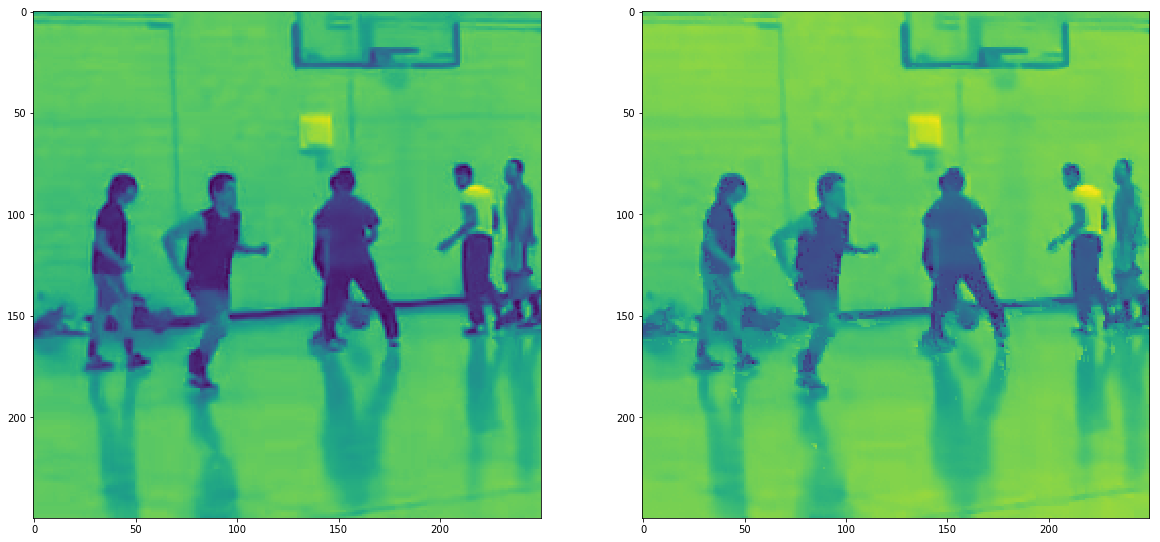

In [89]:
print(len(gts),len(preds))
print(gts[index].shape)
print(np.max(preds[index]),np.min(preds[index]),np.max(gts[index]),np.min(gts[index]))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gts[index])
plt.subplot(1,2,2)
plt.imshow(preds[index])

In [90]:
noisy_image = preds[index]
clean_image = gts[index]
clean_image = clean_image.astype("float32")
noisy_image = noisy_image.astype("float32")
ssim = compare_ssim(clean_image,noisy_image)
psnr = compare_psnr(clean_image,noisy_image)
print("psnr=",psnr,",ssim=",ssim)

psnr= 23.5475207163 ,ssim= 0.963248638762


In [91]:
inpt = np.reshape(noisy_image,(1,*noisy_image.shape,1))

In [92]:
#### model: DnCNN with Dilated conv, depth=8, filters=32

psnr= 23.9076271797 ,ssim= 0.965746505353


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


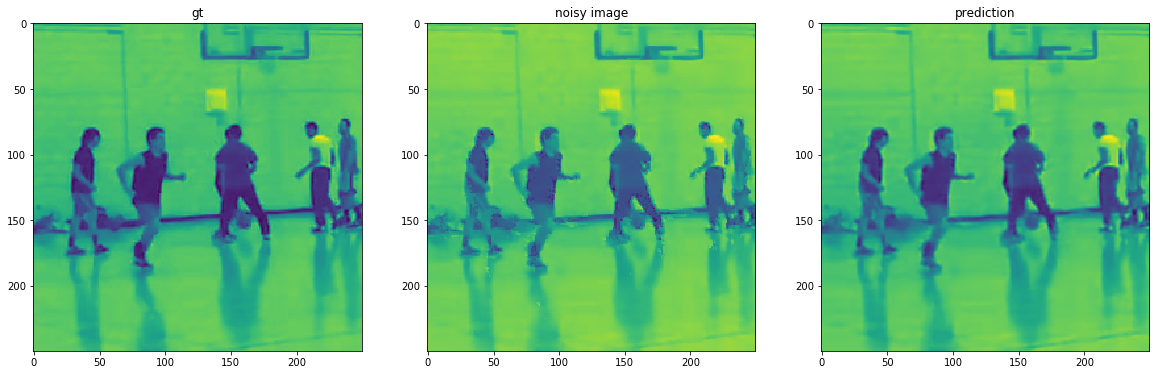

In [93]:
predict = s_model_3.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")
save_image(fig_save_dir,filename[index],predict,'w_8_32_mse')

In [94]:
#### model: DnCNN, depth=17, filters=64

psnr= 24.0567030309 ,ssim= 0.972476150794


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


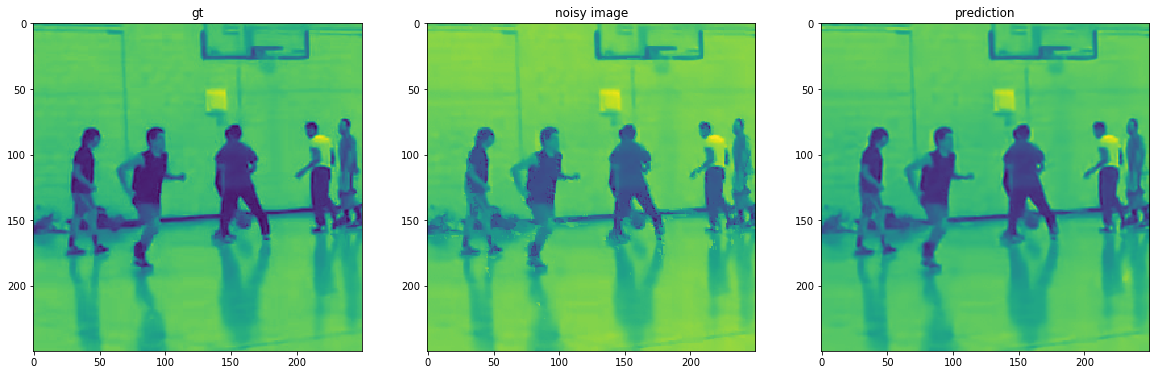

In [95]:
predict = model_1.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")
save_image(fig_save_dir,filename[index],predict,'17_64_sse')

psnr= 24.0547090578 ,ssim= 0.970572101537


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


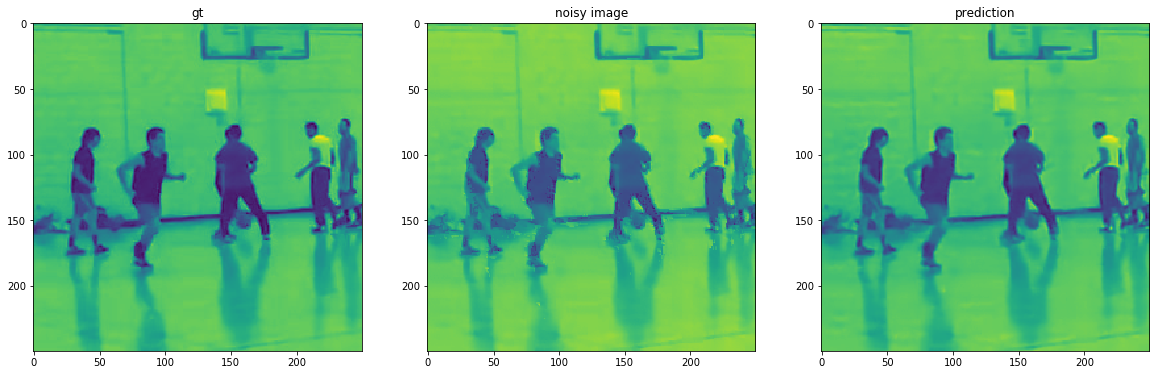

In [96]:
predict = model_4.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")
save_image(fig_save_dir,filename[index],predict,'17_64_mse')

In [97]:
##############################################  DNCNN PRETRAINED ##############################################

In [98]:
comp_model_1 = pre_DnCNN(depth=17,filters=64,image_channels=1, use_bnorm=True)
comp_model_1_save_dir = "/home/weixin/Documents/MyProjects/DVS_results_comparison/models/DnCNN/"
comp_model_1.load_weights(os.path.join(comp_model_1_save_dir,"model.h5"), by_name=True)

psnr= 22.9605079972 ,ssim= 0.941396758424


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


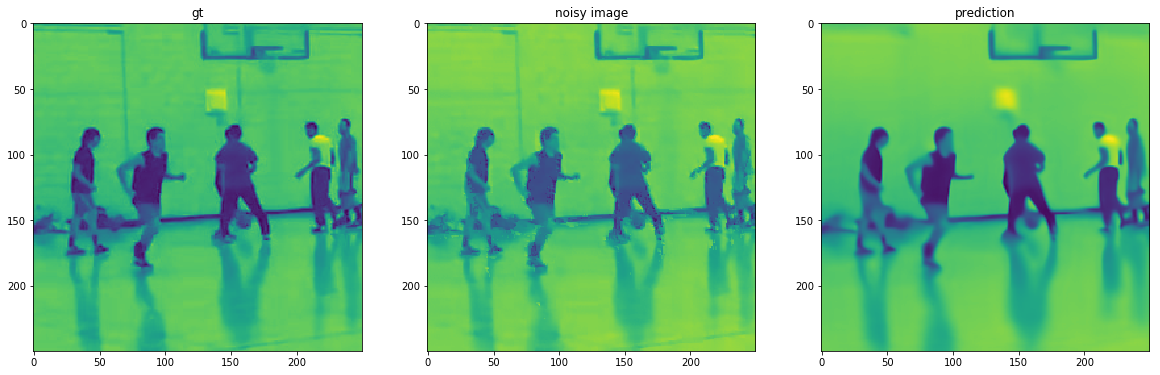

In [99]:
predict = comp_model_1.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")
save_image(fig_save_dir,filename[index],predict,'DnCNN_pre')